## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of one part:
1. 	Exploratory Data Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. $\color{red}{\text{Add as many cells as you need}}$, for easy readability comment when possible.
Hopefully this homework will help you develop skills, makes you understand the flow of an EDA and get you ready for individual work.

**Submission: Send in both a ipynb and a html file of your work.** 

Good luck!

# Exploratory Data Analysis (EDA) 

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

This homework basically asks you to replicate the excersize posted on canvas for the iris dataset. Read the slides and check the code in the Iris_EDA.html file.The most important thing is to give some explanation every step of the way. You can only get full credit for the homework if we see your answers (spitting out code is not enough). 

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Play with graphs

$\color{red}{\text{Don't forget to add "markdown" cells to include your findings or to explain what you are doing}}$


In [19]:
# importing packages
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Reading the CSV file
df_fish = pd.read_csv("/content/Fish.csv")
 
# Printing top 5 rows
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Provide descriptions of your sample and features

In [21]:
#Getting insights about the dataset
#command to check datatypes of each column in fish dataset
df_fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


<font color='red' size="4"><strong>Your Answer:</font></strong>



***Note : All the definations of length1, lenght2, lenght3 attributes are described in one of the  similar  type of  dataset found  on internet.***

**Species:** This column specifies the name of type of fish and further more   **(categorical)**

**Weight:** This column stores the weight of the fish in respective units **(quantitative)**

**Length1:** The distance between nose to tail of the fish is stored in this filed in respective units **(quantitative)**

**Length2:** the length of the fish from the nose to the starting point of the tail fin in respective units (**quantitative)**

**Length3:** The distance of the fish from  the end of the tail to the nose in  respective units(**quantitative)**

**Height:** The height of the fish in respective units **(quantitative)**

**Width:** The width of the fish at its widest point in respective units**(quantitative)**

In [22]:
#code to check type of species in the given dataset
df_fish['Species'].value_counts().reset_index(name='count')

,index,count
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


The dataset points out six species of fish among which Perch type counts maximum ,where as Whitefish reports low. 

### 2. Check for missing data

In [23]:
#code to check the missing values
df_fish.isnull().sum().reset_index(name='count')

,index,count
0,Species,0
1,Weight,0
2,Length1,0
3,Length2,0
4,Length3,0
5,Height,0
6,Width,0


<font color='red' size="4"><strong>Your Answer:</font></strong>

**The above output shows the given dataset has no null values.**

**Advantages of having No_values:**

   **1. More precise statistical analysis**

   **2. Higher efficiency in results**

   **3.Accurate Data analysis**

   **4. Cost of cleaning is reduced**

   **5. In general, Machine learning algorithms works more accurate with datasets having NO_null values**

### 3. Identify the shape of your data

In [24]:
#code to describe the number of rows and coulmns
df_fish.shape

(159, 7)


<font color='red' size="4"><strong>What observations did you make?</font></strong>

**Given dataset contains 159 rows and 7 columns**

### 4. Identify significant correlations

In [25]:
#code to check correlation between Weight and height of the fishes
correlation_wh = df_fish['Weight'].corr(df_fish["Height"])
correlation_wh

0.7243453291993318

In [26]:
#code to check correlation between Weight and lenght1 of the fishes
correlation_wl1 = df_fish['Weight'].corr(df_fish["Length1"])
correlation_wl1

0.915711716031204

In [27]:
#code to check correlation between Weight and length2 of the fishes
correlation_wl2 = df_fish['Weight'].corr(df_fish["Length2"])
correlation_wl2

0.9186177013642217

In [28]:
#code to check correlation between Weight and lenght3 of the fishes
correlation_wl3 = df_fish['Weight'].corr(df_fish["Length3"])
correlation_wl3

0.9230435593620121

In [29]:
#code to check correlation between height and length1 of the fishes
correlation_h1 = df_fish['Height'].corr(df_fish["Length1"])
correlation_h1

0.6253779191601657

In [30]:
#code to display the correlation each column with other columns in the given dataset
corr_matrix = df_fish.corr()
corr_matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<font color='red' size="4"><strong>Your Answer:</font></strong>


>>>**The degree of similarity between two categories in a dataset is indicated by their correlation. It is used to measure how closely changes in one column affect changes in the other column. Correlation can be zero, positive, or negative.**

* By observing the above cells, we can conclude the column 'Weight' to 'length1','length2','length3' column has almost correlation factor which is almost 0.92. 

(Length1,lenght2) reports 0.99 correlation ,leaving the reflexive correlation  

* This indicates both  columns move in the same way if the correlation coefficient is almost nearly to one , which denotes a perfect positive correlation.

* The columns 'Height' and 'Lenght' has correlation factor mostly varies 0.625 to 0.79 from the above table,where as 'Weight' and 'Height' are moderately related ,figure rounds to 0.72.


### 5. Spot outliers and what to do with them?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05ad9ec1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05ad9ec610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05ad9ddf10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f05ad9ecb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f05ad9ece20>,
 'means': []}

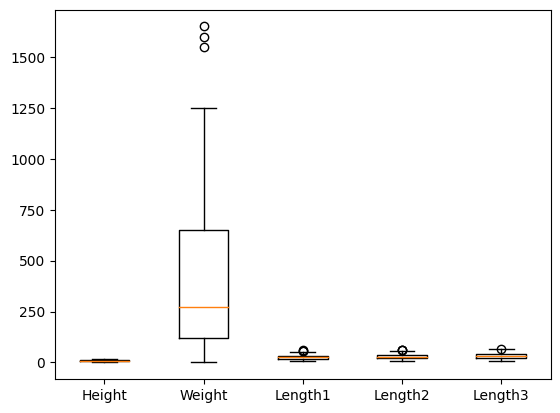

In [31]:
#code to spot the outliers of the all columns of the given dataset
plt.boxplot([df_fish['Height'], df_fish['Weight'],df_fish['Length1'],df_fish['Length2'],
             df_fish['Length3']], labels=['Height','Weight','Length1','Length2','Length3'])
             

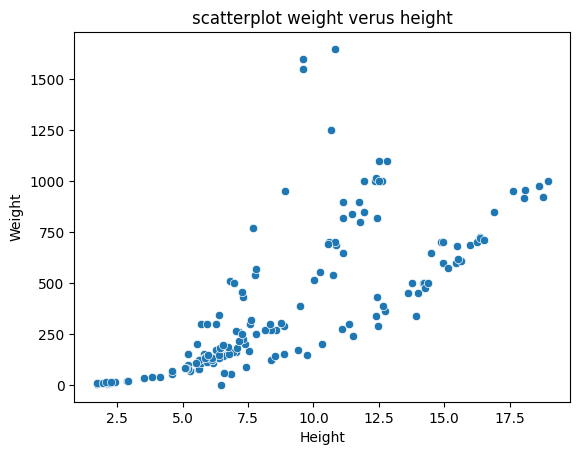

In [32]:
#code to plot scatter plot for weight and height columns to point-outs the outliers
sns.scatterplot(x='Height', y='Weight', data=df_fish)
plt.title("scatterplot weight verus height")
plt.show()

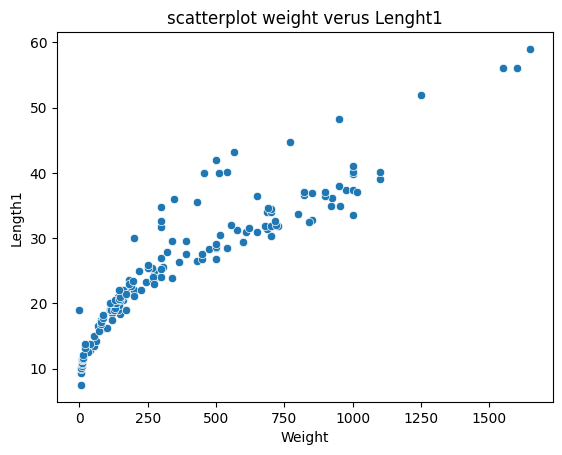

In [33]:
#code to plot scatter plot for weight and lenght1 columns to point-outs the outliers
sns.scatterplot(x='Weight', y ='Length1', data=df_fish)

plt.title("scatterplot weight verus Lenght1")

# Show the plot
plt.show()

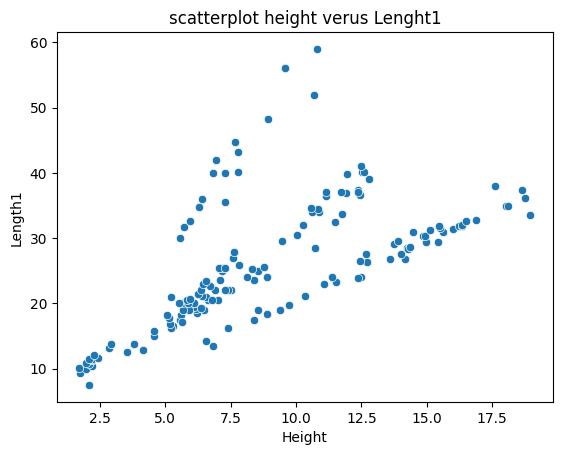

In [34]:
#code to plot scatter plot for heigth and lenght1 columns to point-outs the outliers
sns.scatterplot(x='Height', y ='Length1', data=df_fish)

plt.title("scatterplot height verus Lenght1")

# Show the plot
plt.show()

<font color='red' size="4"><strong>Your Answer:</font></strong>


1. It boxplot  clearly shows that only Weight columns has slight more outliers when compared with others columns.

2. Scatterplot shows different outliers such a datapoint which lies away from the cluster or groups of points is consider as Outlier.

3. Having the outliers in the given dataset leads slow down the computation process while applying different machine learning alogirthms.

4. Different ways to handle the outliers 
     
     * Elimatie Outliers
     * Transformation of extreme points or outliers by some mathematical function to combine with cluster of points
     * Studying the outliers seperately to find out insights from outliers
     

<font color='red' size="6"><strong>Summary</font></strong>


>>> Overall the Exploratory Data Analysis on the given fish dataset
helps identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, and find interesting corelations among the variables weight and height.


 * It contains only one categorical variable or column  and remaining are quantitative columns

 * The datasets has zero null values ,this prominent feature of data reduce the cost of cleaning allowing to obtain more precise  statistical analysis

 * The dataset contains outliers ,however they have least effect on the highly populated cluster in the weight vs lenght1 plot where as they effect the cluster int the height vs length1 plot.  

 * Given dataset is binded with 159 rows and 7 columns

 * By observing the above cells, we can conclude the column 'Weight' and        'length' related attributes has almost correlation factor which is  0.92.




